In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read data

In [2]:
df = pd.read_csv('../../../Data/Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


### Rename columns

In [3]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

df.columns.sort_values()

Index(['1st Floor Area', '2nd Floor Area', '3 Season Porch Area', 'Alley',
       'Basement Area', 'Basement Cond', 'Basement Exposure',
       'Basement Finish', 'Basement Finished Area', 'Basement Full Baths',
       'Basement Half baths', 'Basement Height', 'Basement Unfinished Area',
       'Bedrooms Above Grade', 'Bldg Type', 'CentralAir', 'Electrical',
       'Enclosed Porch Area', 'Exterior Cond', 'Exterior Primary',
       'Exterior Qual', 'Fence', 'Fireplaces', 'Fireplce Qual', 'Foundation',
       'Full Baths Above Grade', 'Functionality', 'Garage Area', 'Garage Cars',
       'Garage Cond', 'Garage Finish', 'Garage Qual', 'Garage Type',
       'Half Baths Above Grade', 'Heating Qual', 'House Style', 'Kitchen Qual',
       'Kitchens Above Grade', 'Land Contour', 'Land Slope',
       'Living Area Above Grade', 'Location Condition', 'Lot Area',
       'Lot Config', 'Lot Frontage', 'Lot Shape', 'Masonry/Veneer',
       'Masonry/Veneer Area', 'Nbhd', 'Open Porch Area', 'Overall Co

### Check nans

In [4]:
df.isna().sum(axis=0).sort_values(ascending=False)

Alley                       1320
Masonry/Veneer               824
Lot Frontage                 253
Year Garage                   63
Masonry/Veneer Area            8
Total Rooms Above Grade        0
Garage Type                    0
Fireplce Qual                  0
Fireplaces                     0
Functionality                  0
Type                           0
Kitchen Qual                   0
Garage Finish                  0
Bedrooms Above Grade           0
Half Baths Above Grade         0
Full Baths Above Grade         0
Basement Half baths            0
Basement Full Baths            0
Kitchens Above Grade           0
Garage Cars                    0
2nd Floor Area                 0
Garage Area                    0
Garage Qual                    0
Garage Cond                    0
Paved Drive                    0
Wood Deck Area                 0
Open Porch Area                0
Enclosed Porch Area            0
3 Season Porch Area            0
Screen Porch Area              0
Pool Area 

### Drop Alley column

In [5]:
df = df.drop(columns=['Alley'])
df.shape

(1404, 67)

### Drop rows with ANY nans

In [6]:
df.dropna(how='any', axis=0).shape

(457, 67)

### Drop columns with ANY nans

In [7]:
df.dropna(how='any', axis=1).shape

(1404, 63)

# Explore object columns

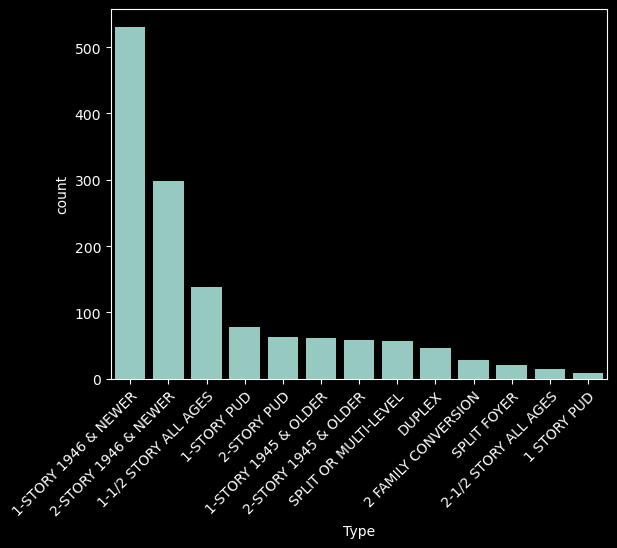

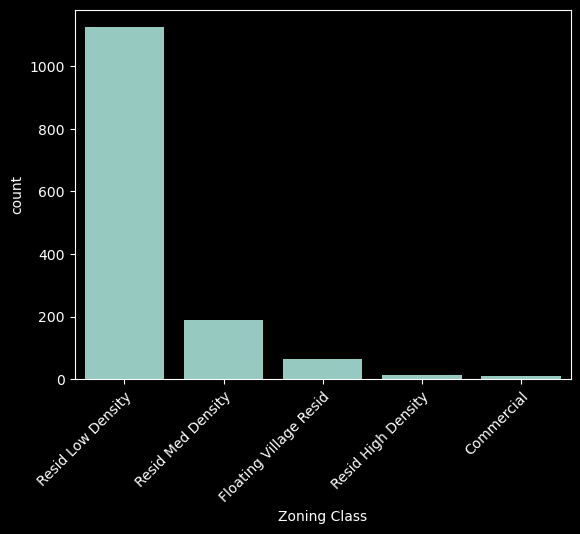

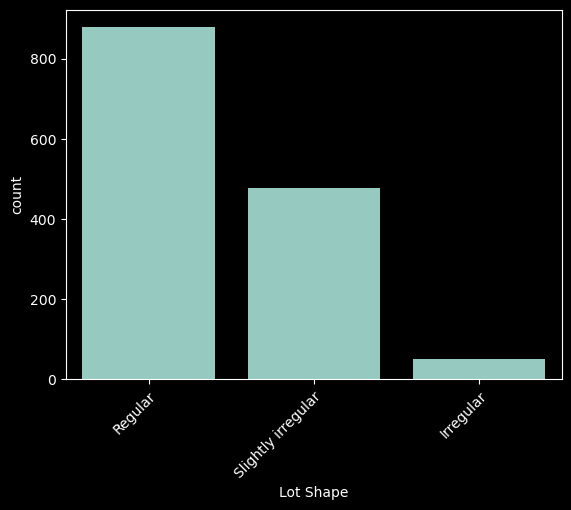

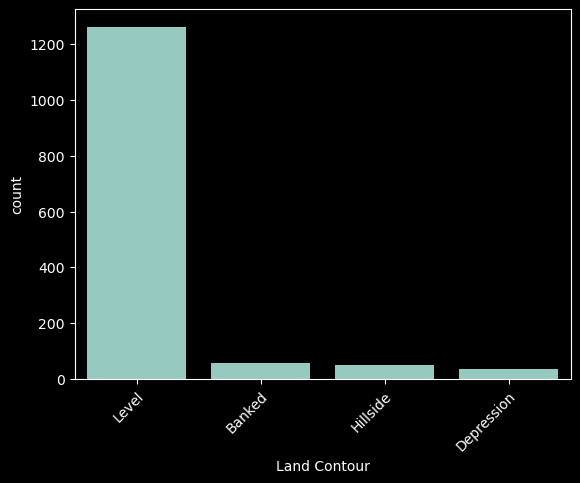

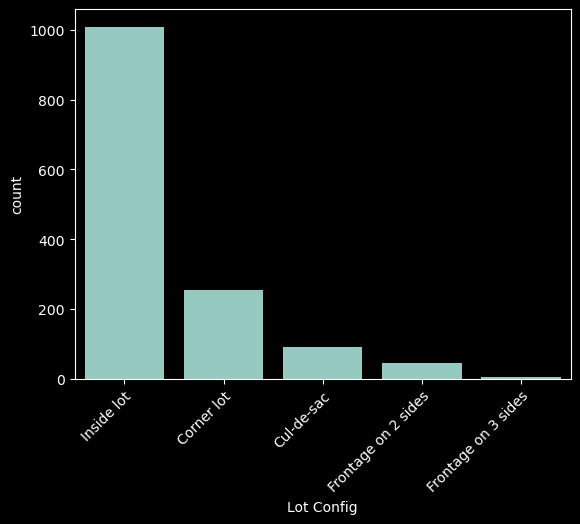

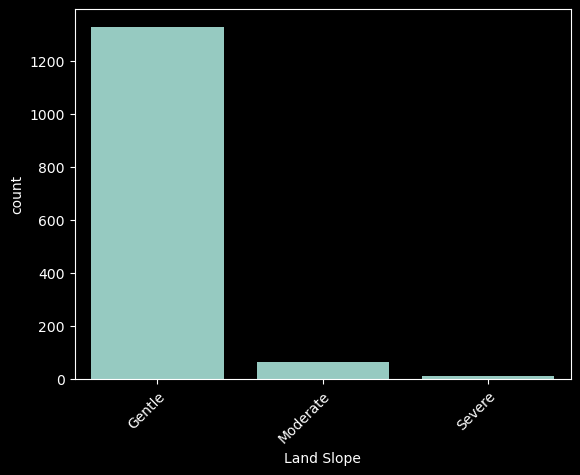

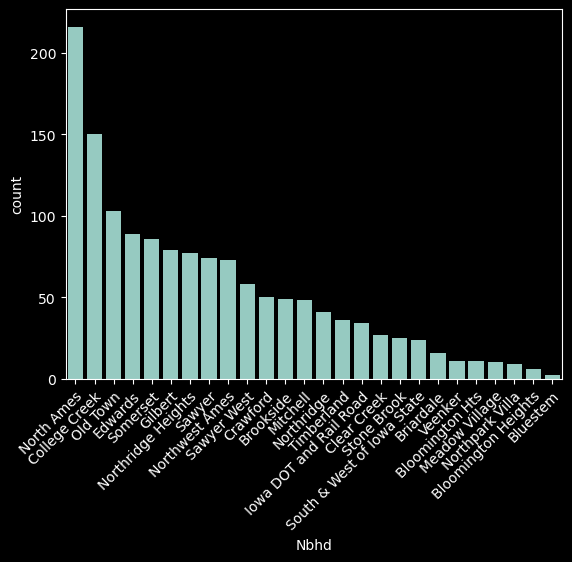

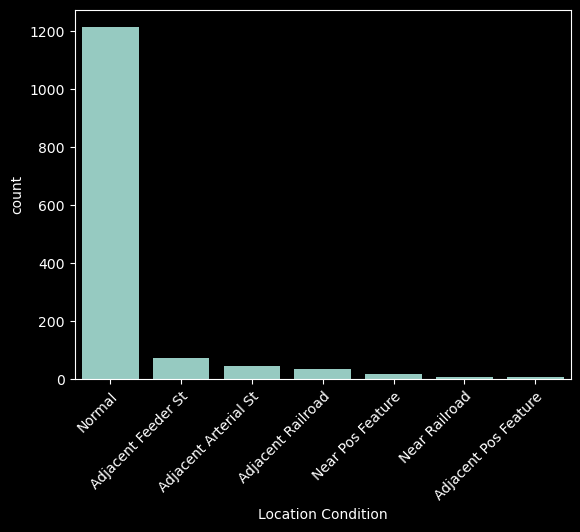

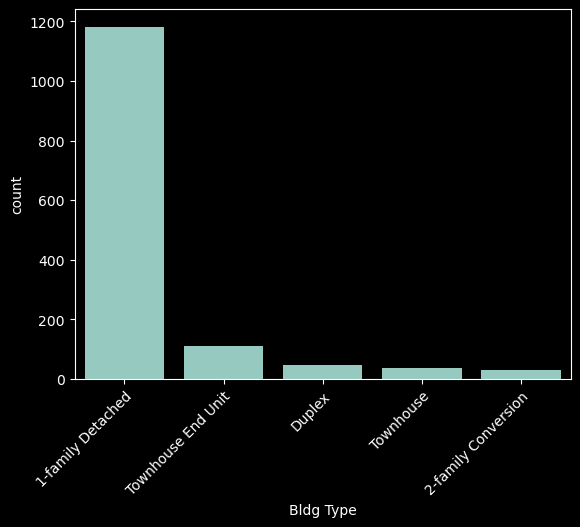

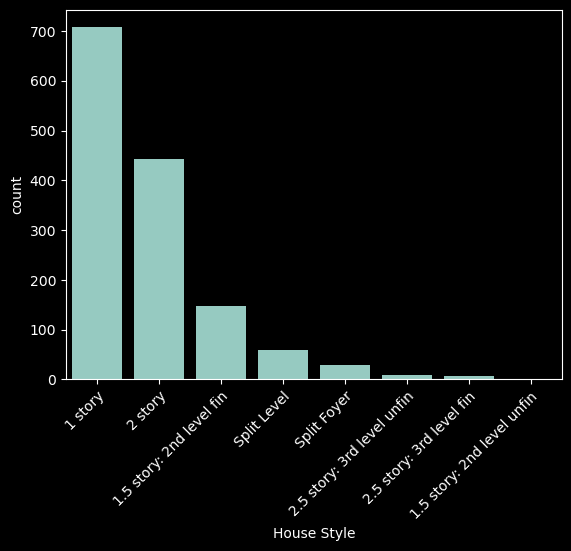

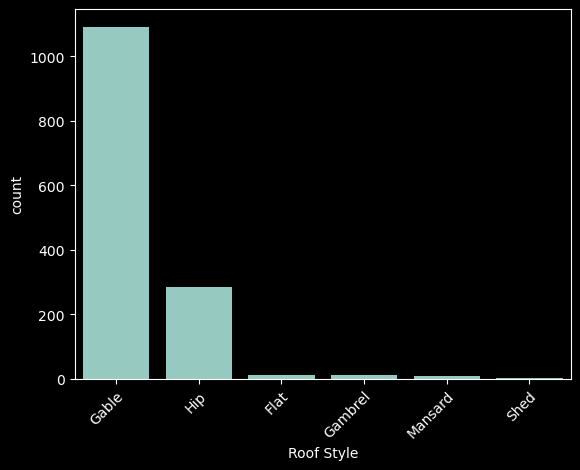

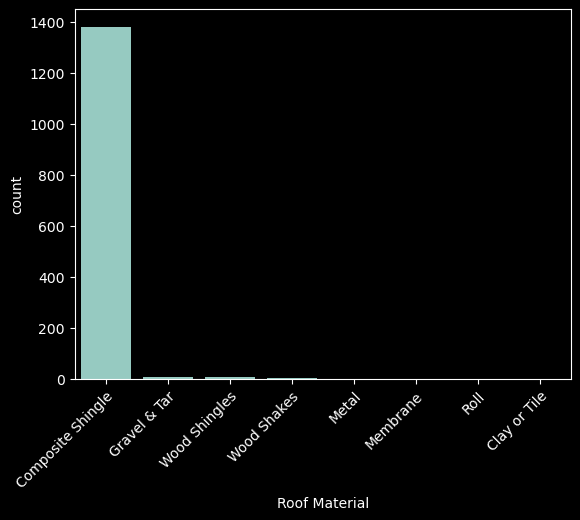

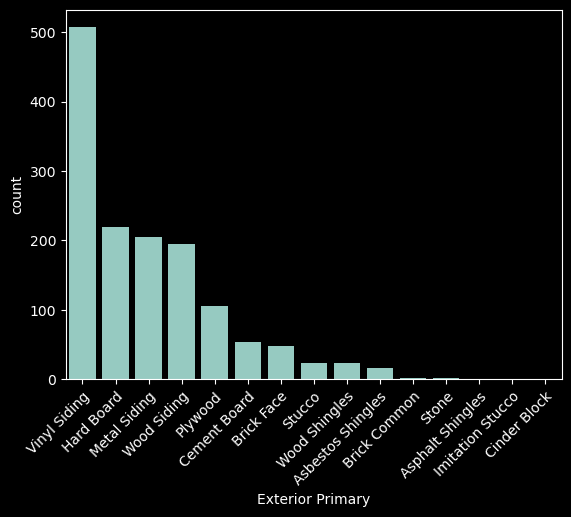

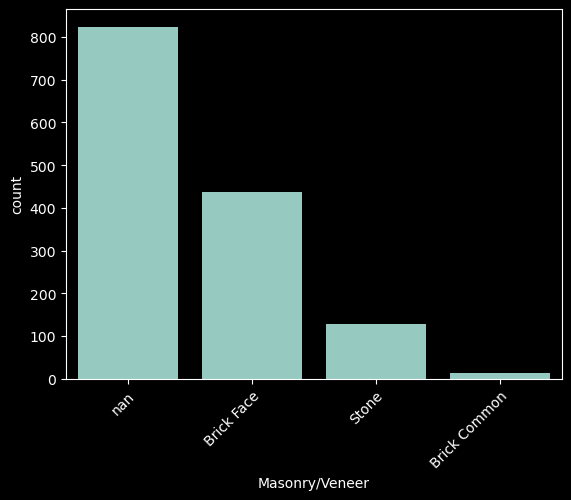

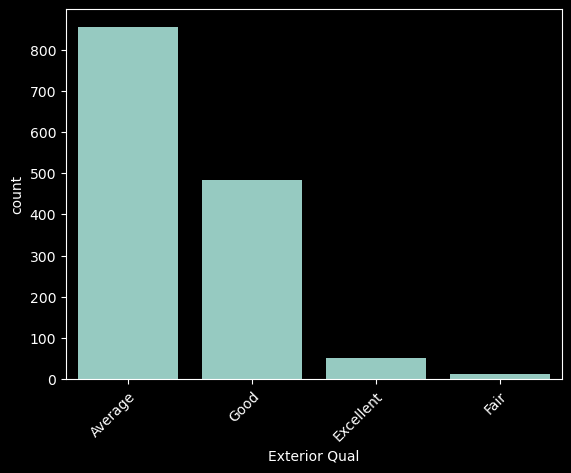

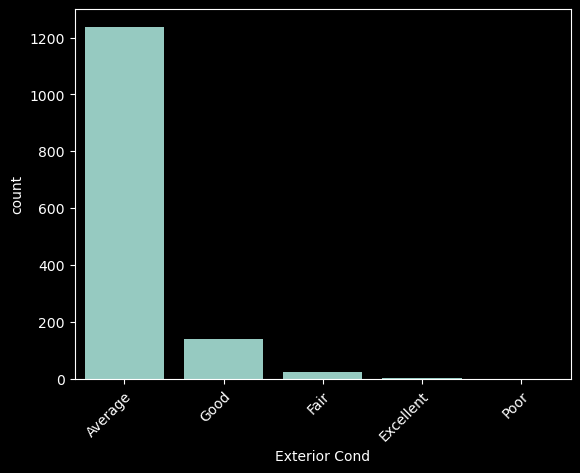

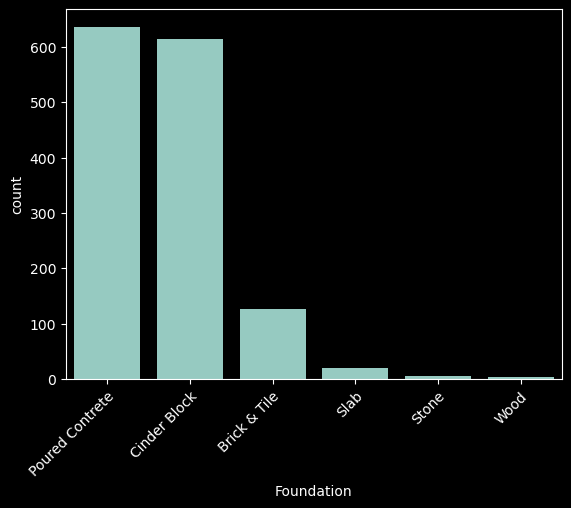

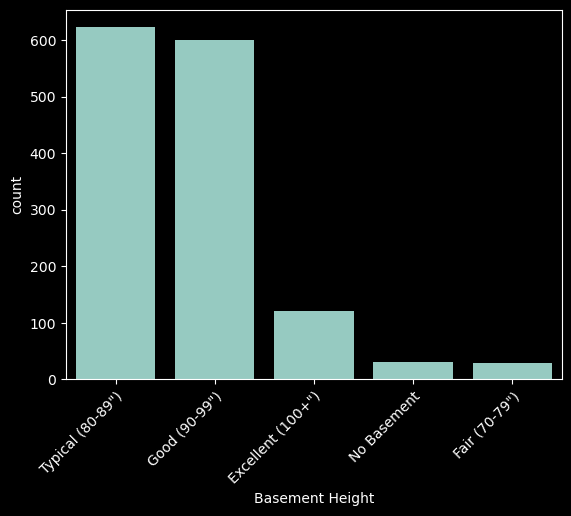

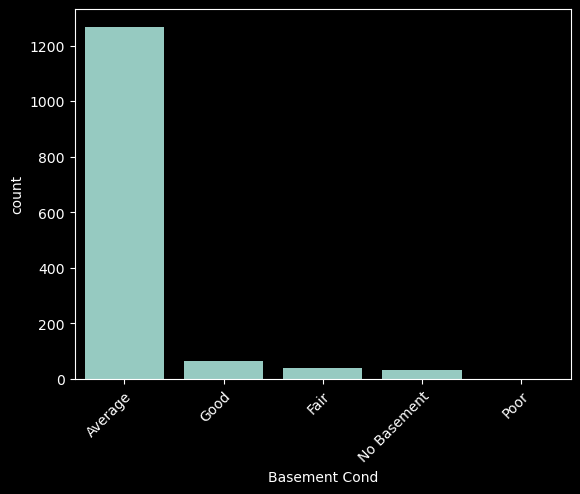

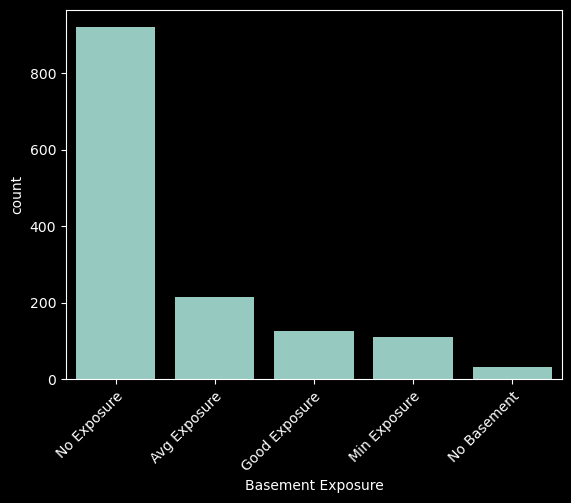

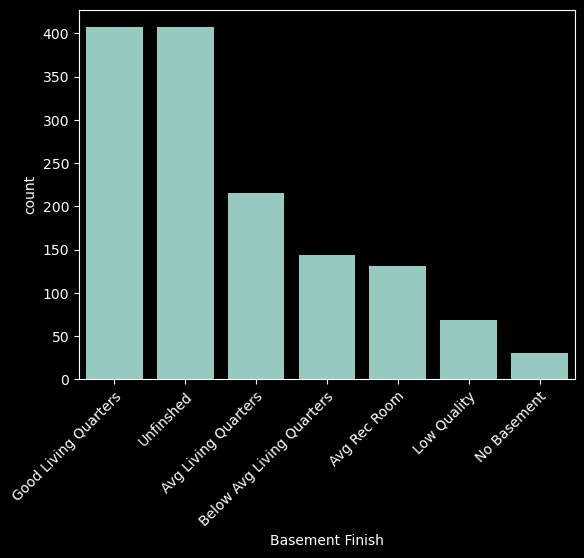

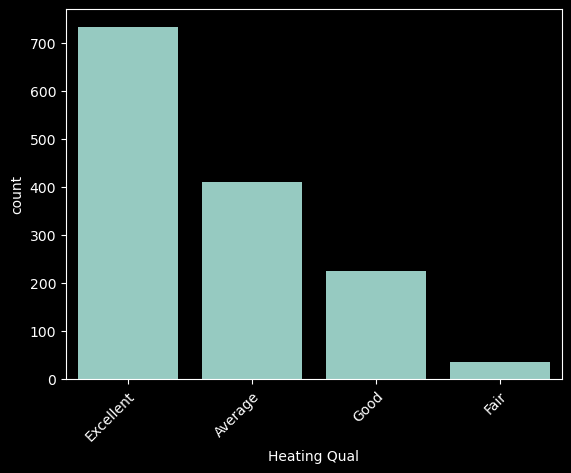

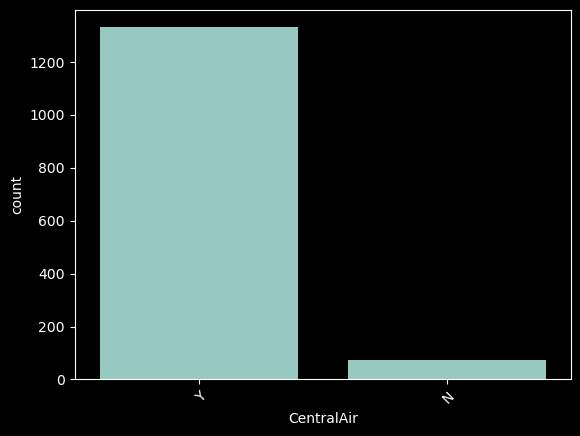

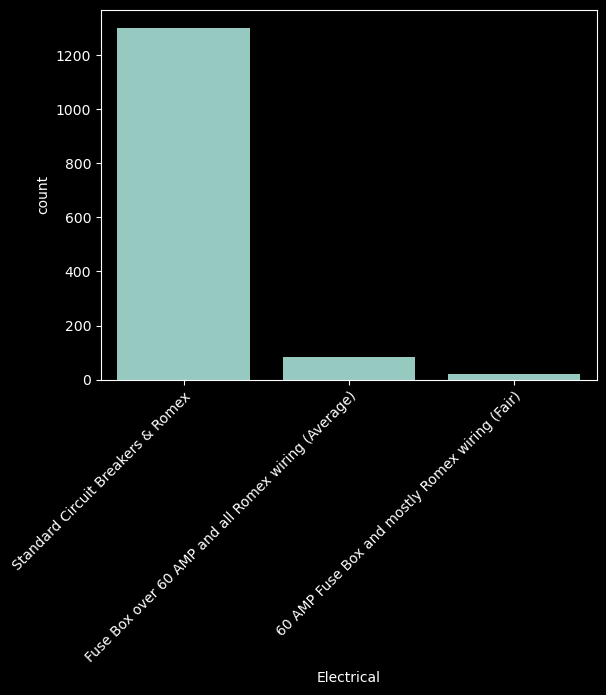

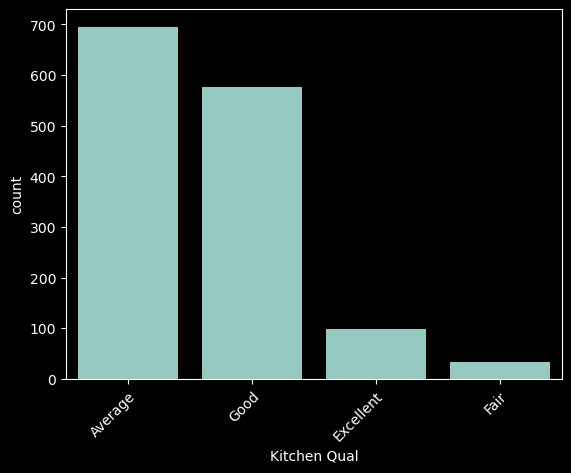

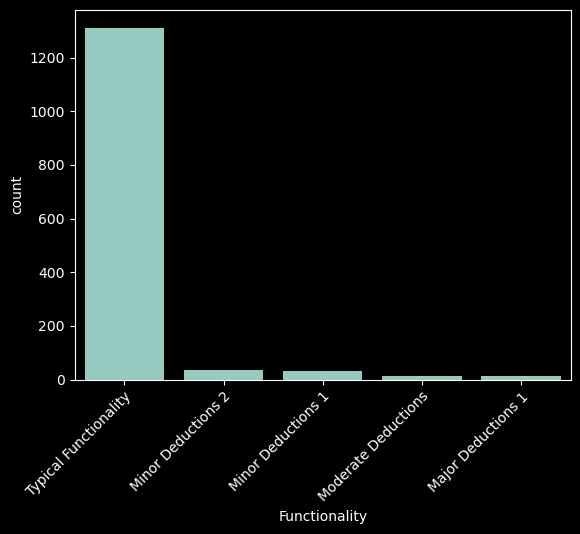

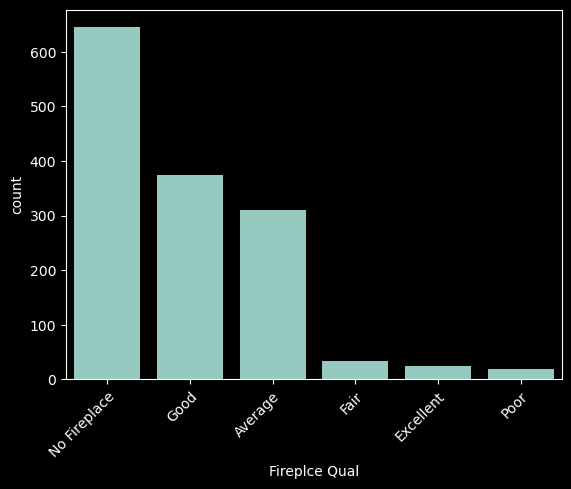

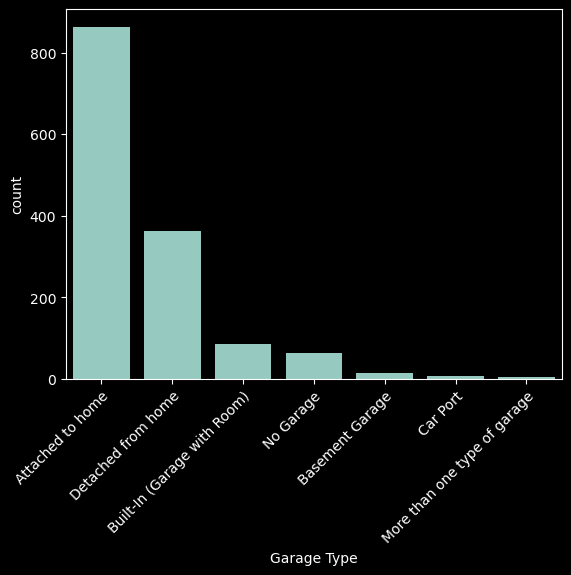

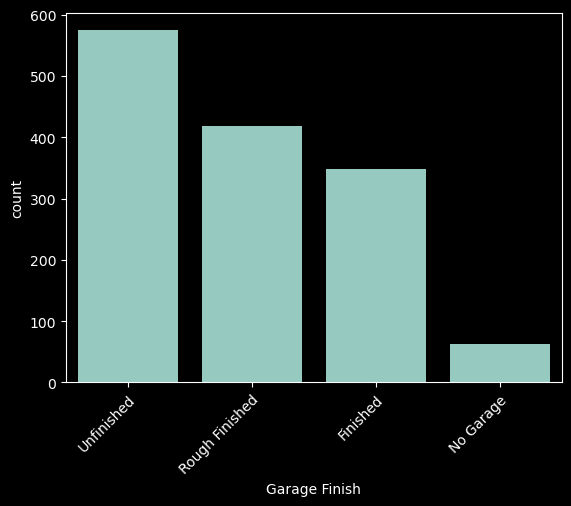

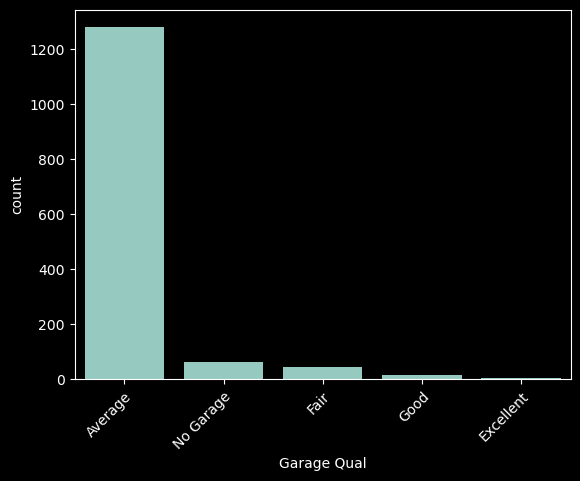

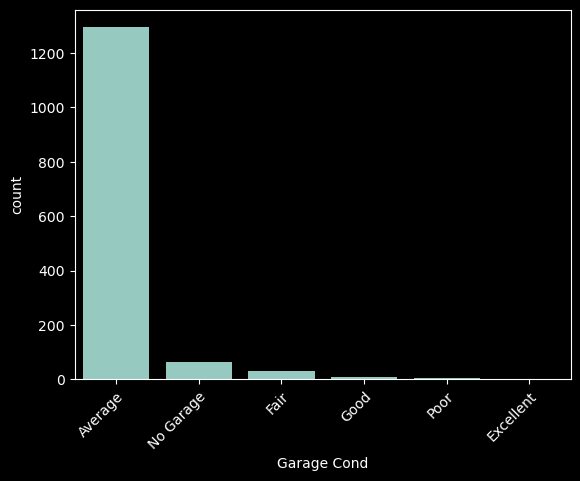

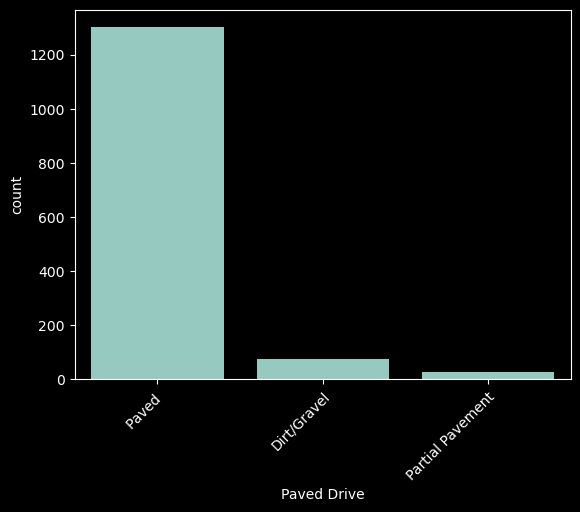

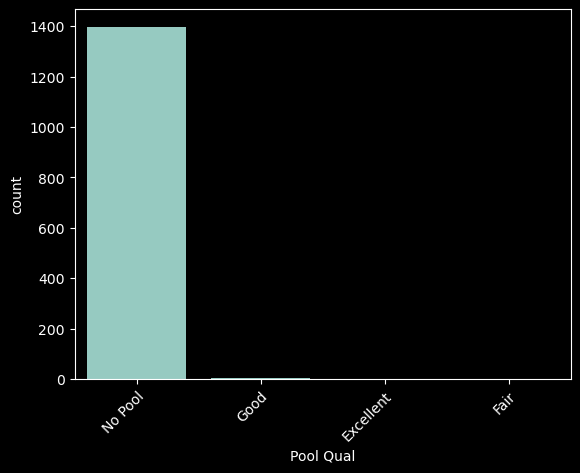

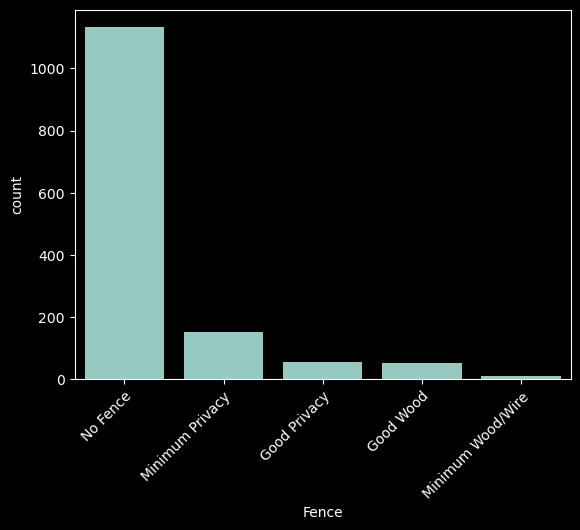

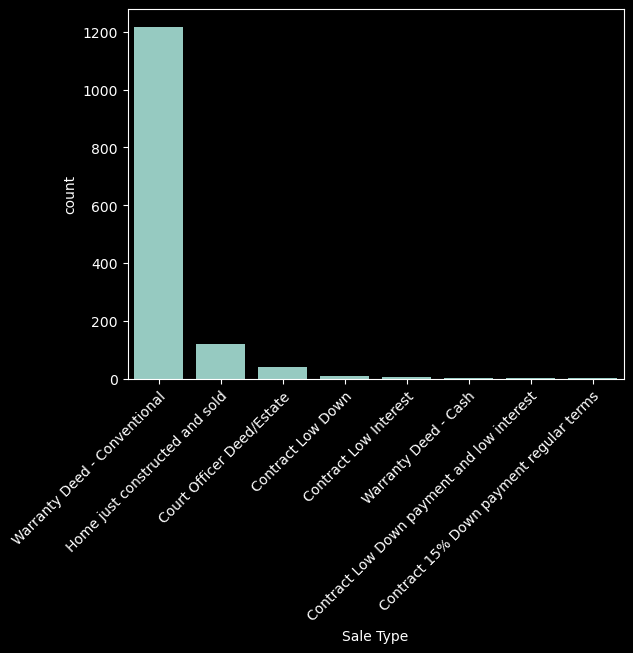

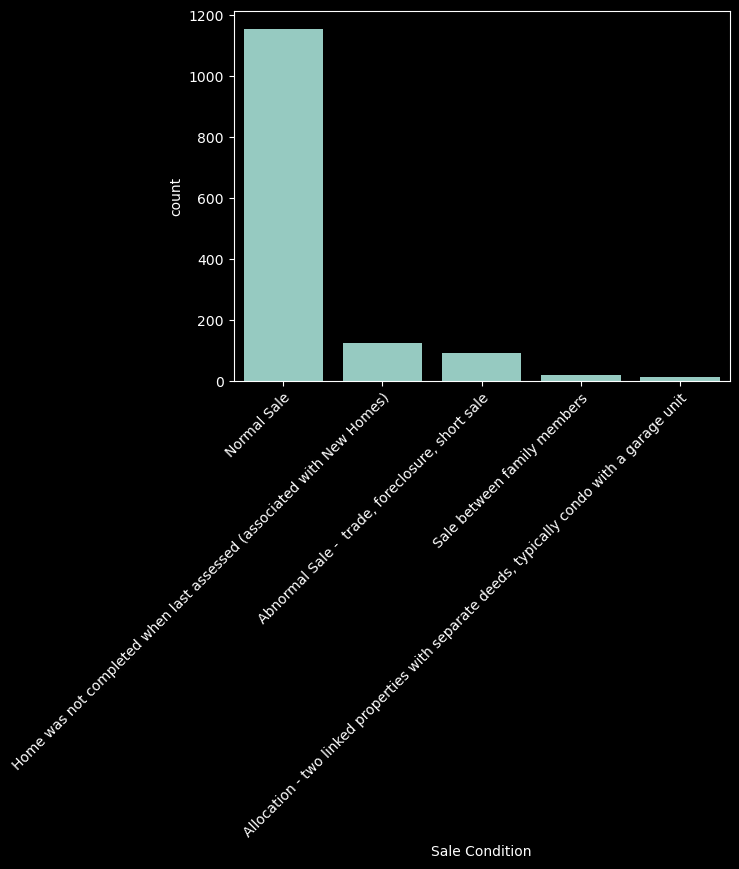

In [8]:
obj_cols = df.select_dtypes(include=object).columns

df2 = df.fillna('nan')

for c in obj_cols:
    sns.countplot(df2, x=c, order=df2[c].value_counts().index)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    plt.show()
# end

# Explore numerical columns

### Create histograms

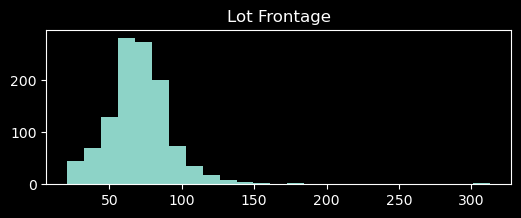

nulls:  253


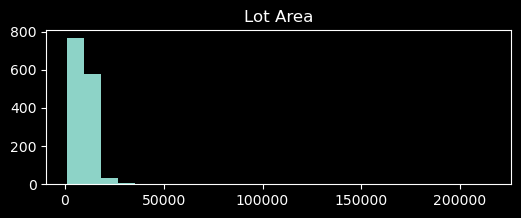

nulls:  0


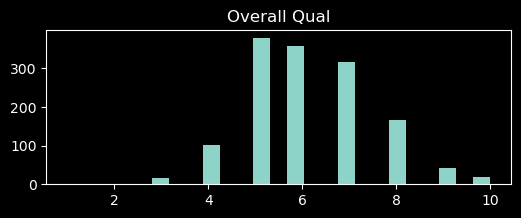

nulls:  0


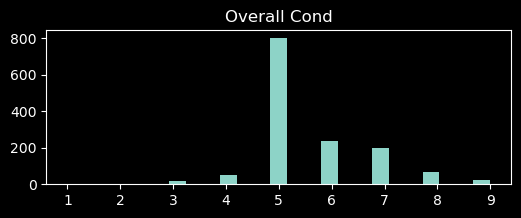

nulls:  0


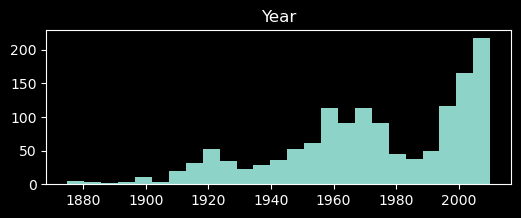

nulls:  0


In [9]:
num_cols = df.select_dtypes(exclude=object).columns

for c in num_cols[:5]:
    ax = df[c].hist(bins=25, figsize=(6,2))
    ax.set_title(c)
    ax.grid(False)
    plt.show()
    print( 'nulls: ', df[c].isna().sum() )
# end

### Plot numeric columns vs. Sale Price

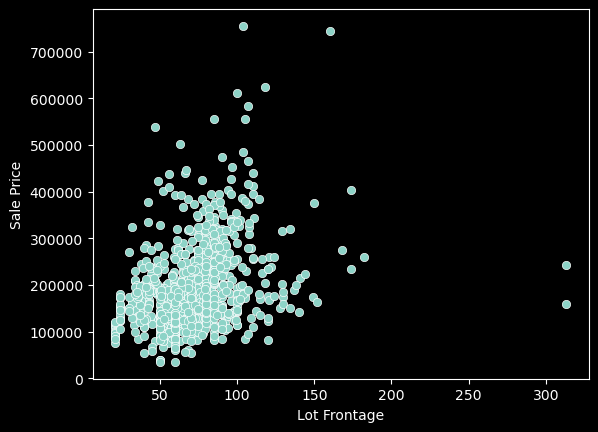

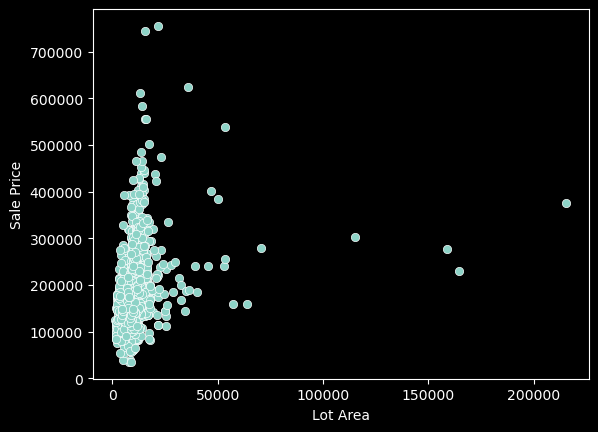

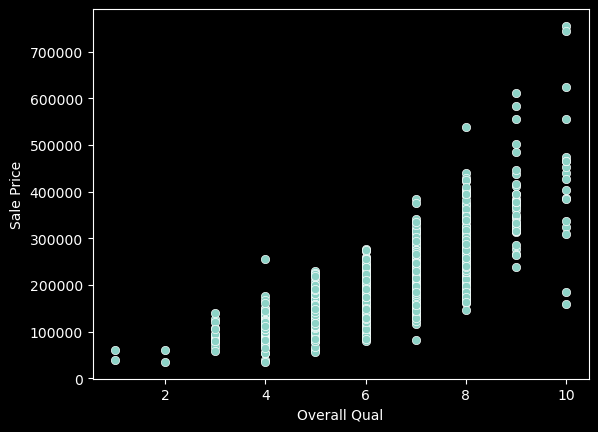

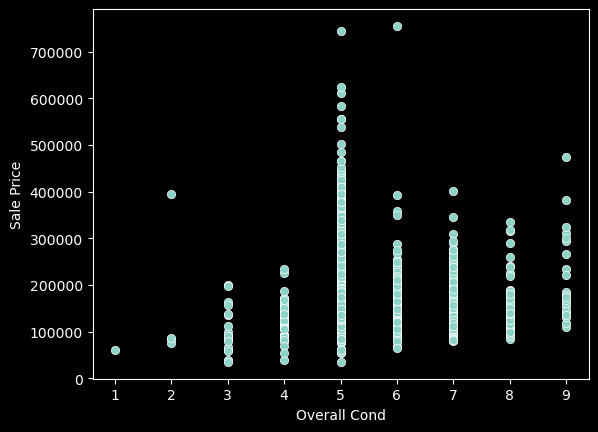

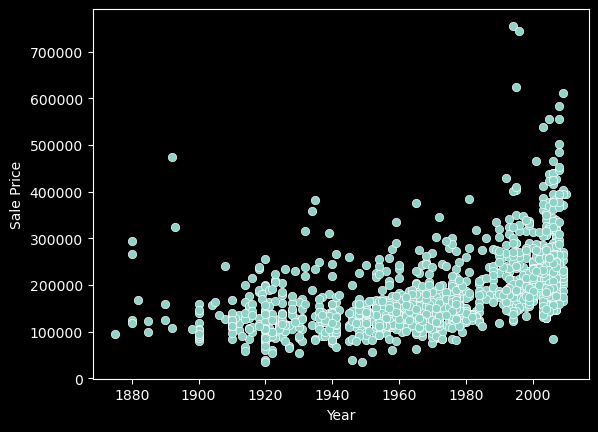

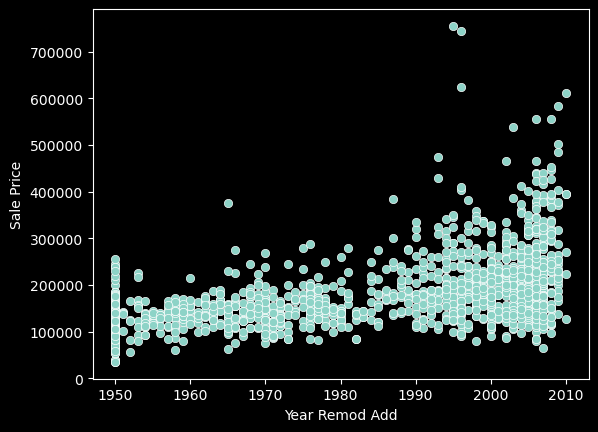

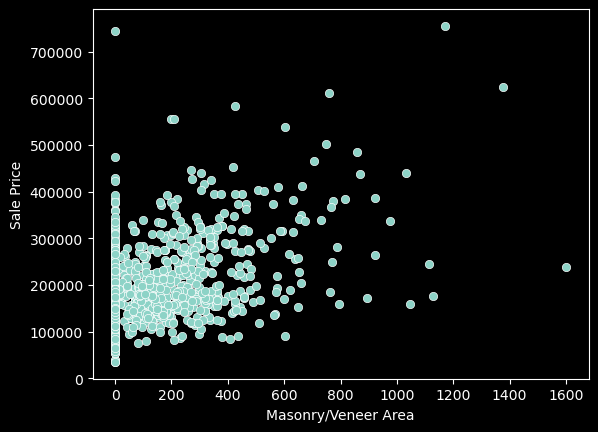

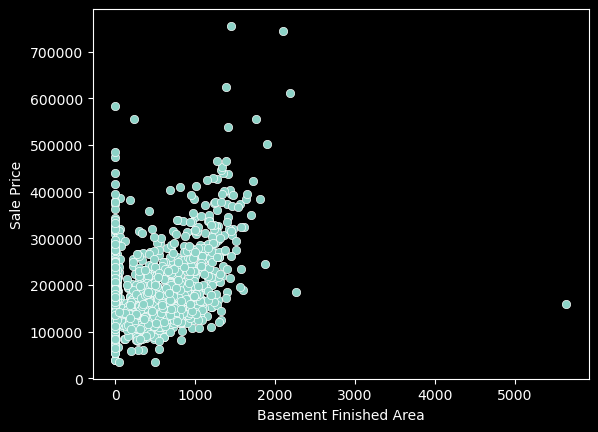

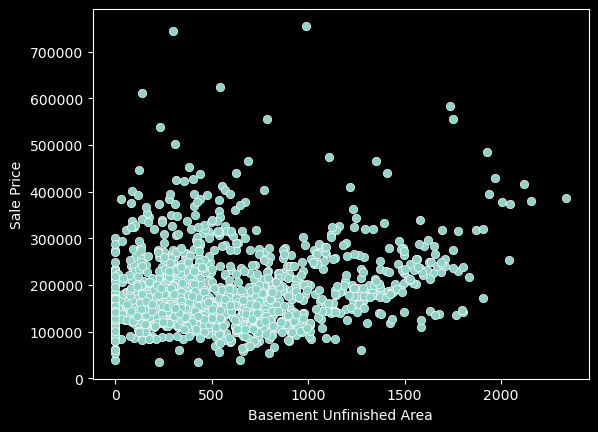

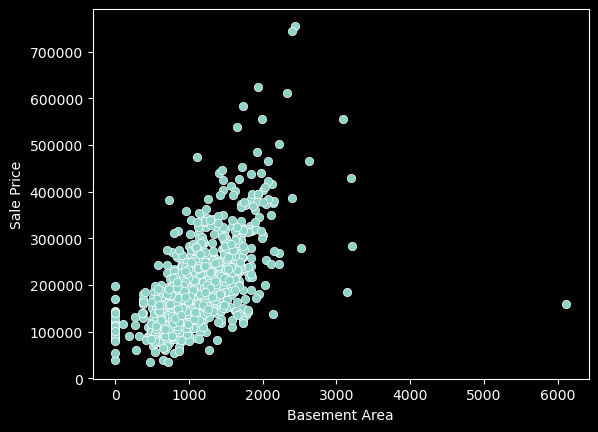

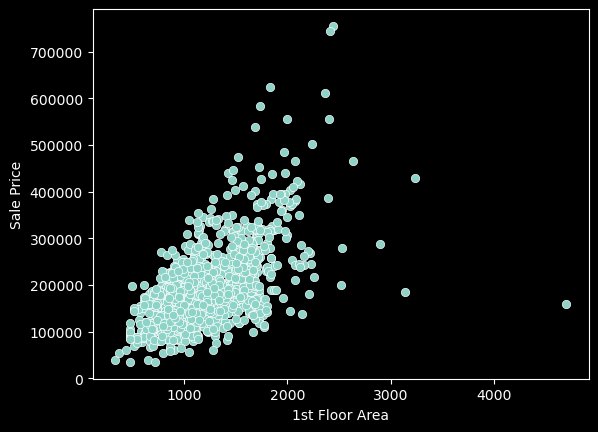

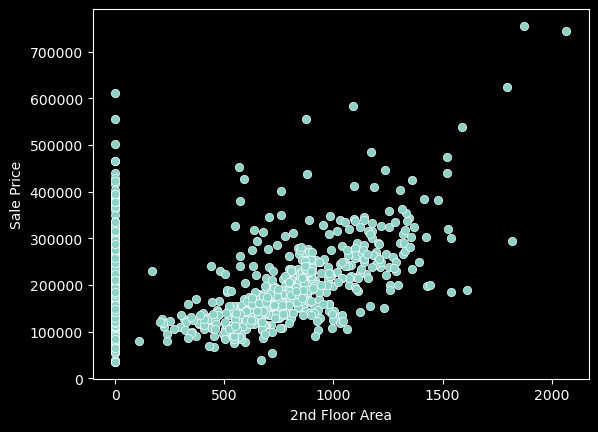

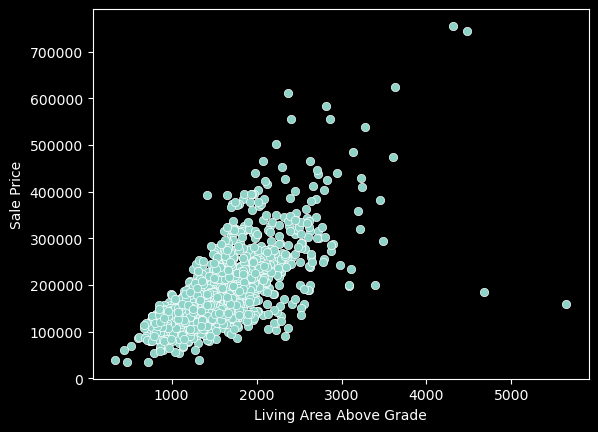

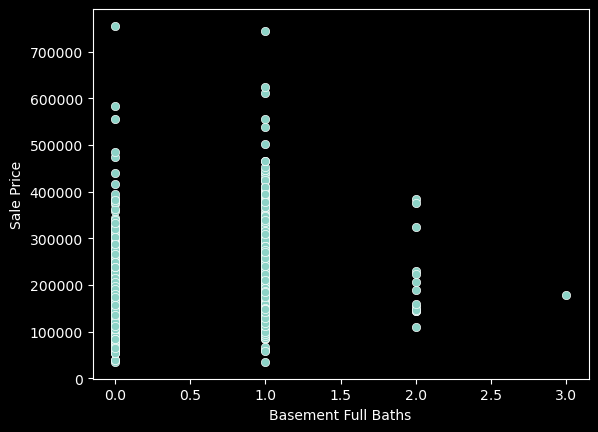

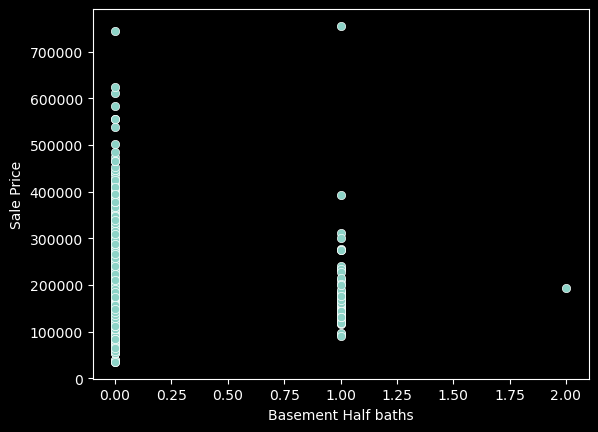

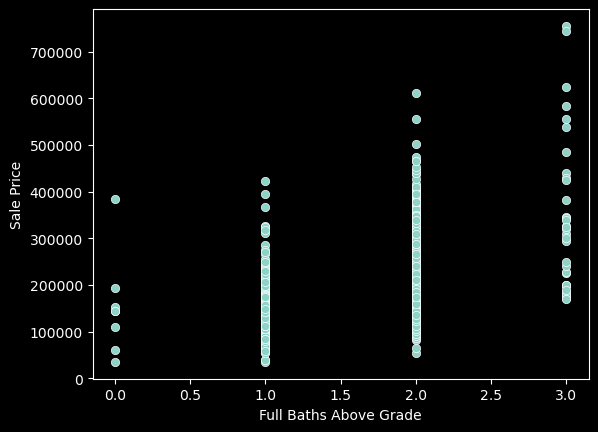

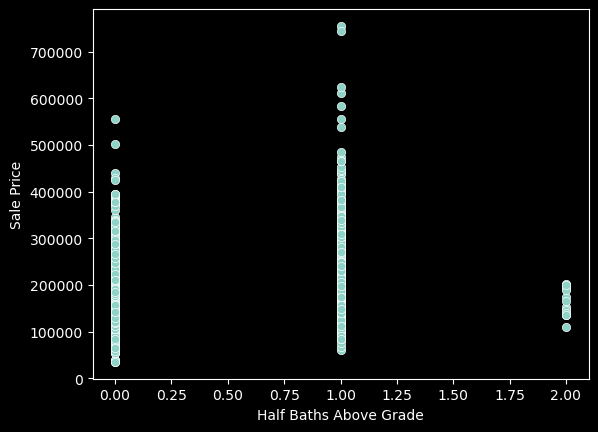

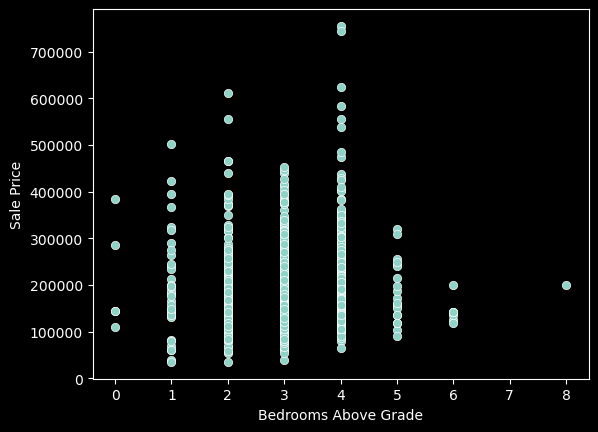

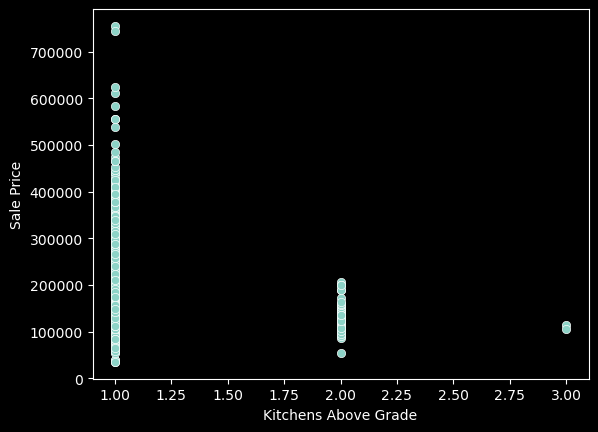

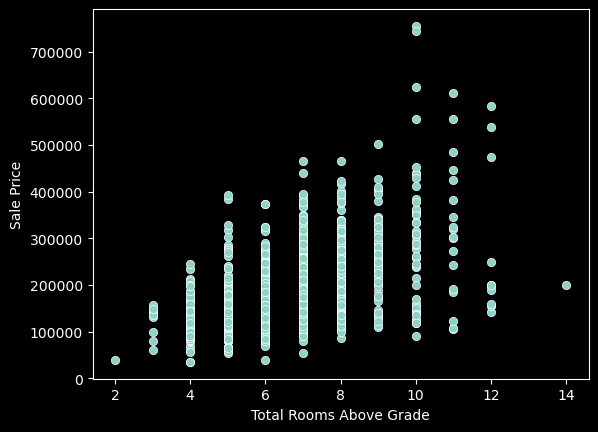

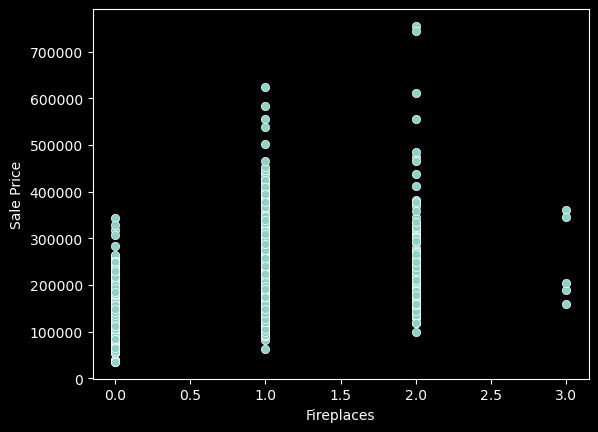

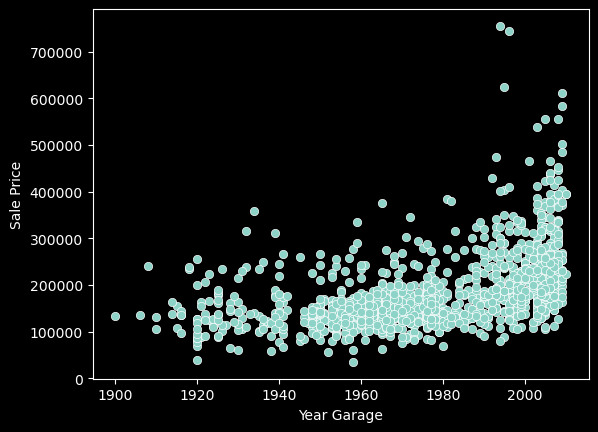

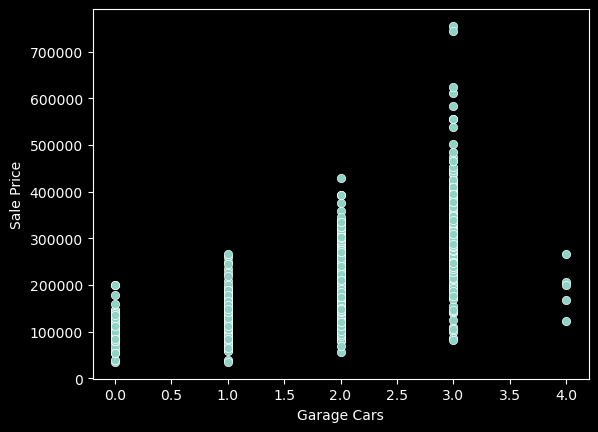

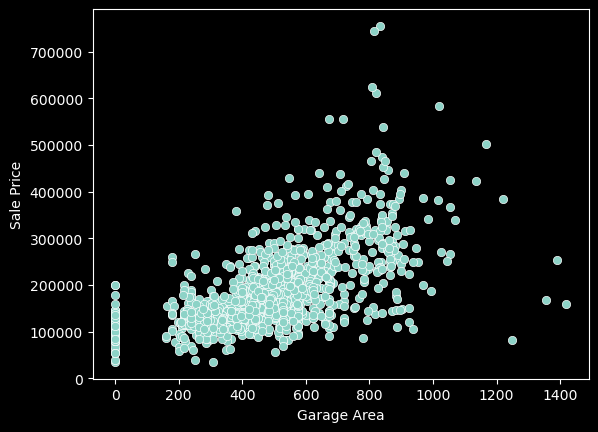

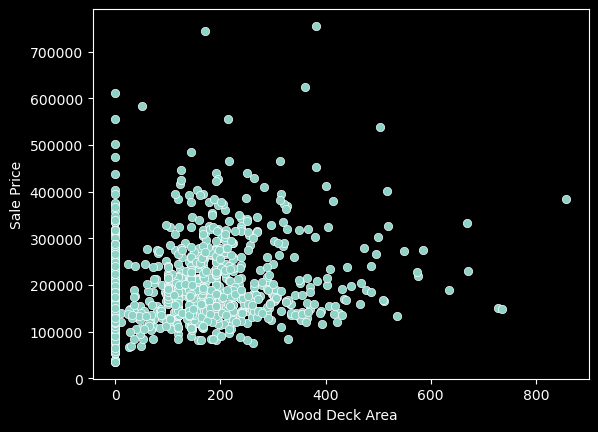

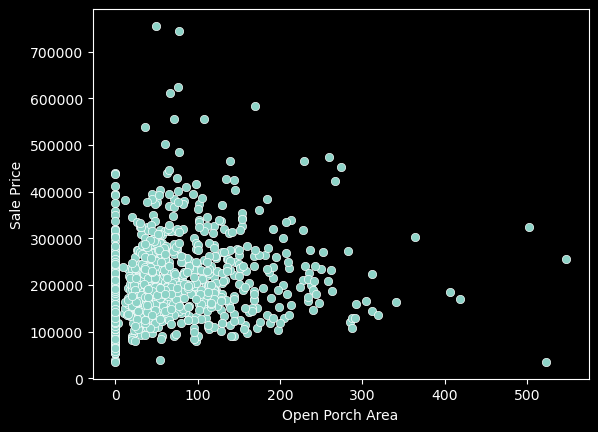

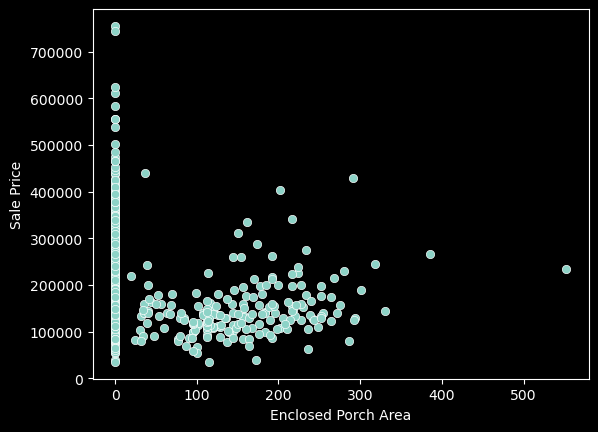

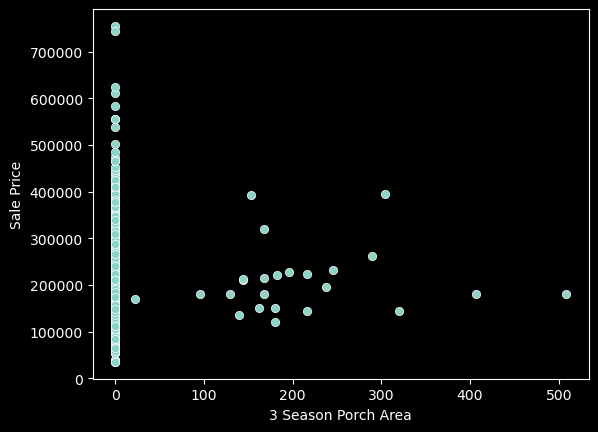

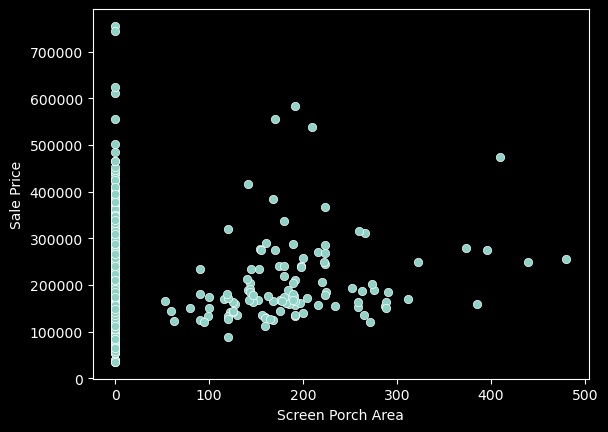

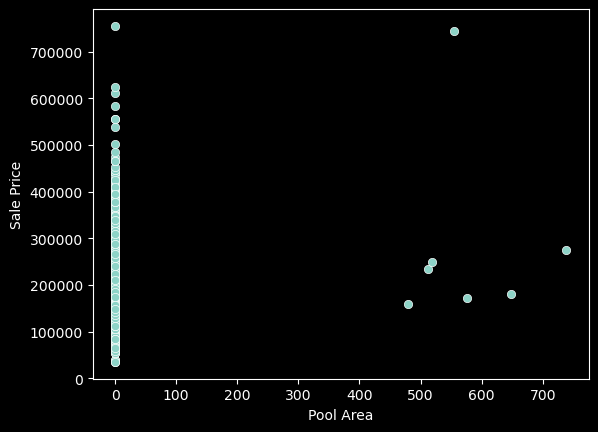

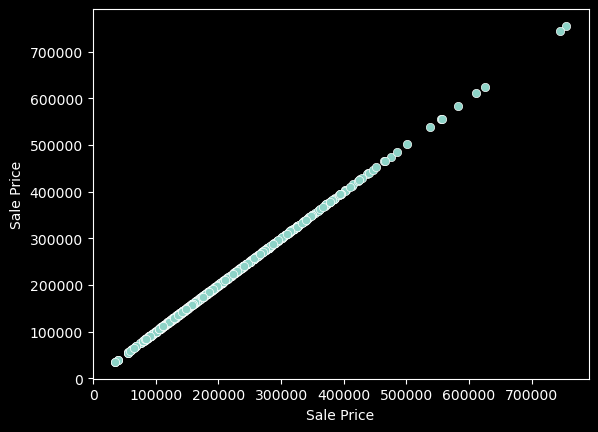

In [10]:
num_cols = df.select_dtypes(exclude=object).columns

for c in num_cols:
    sns.scatterplot(
        data = df,
        x = c,
        y = 'Sale Price'
    )
    plt.show()

### Filter outliers based on quantiles of numeric columns

In [11]:
filt_cols = [
    'Lot Area', 
    'Basement Finished Area', 
    'Basement Area', 
    '1st Floor Area', 
    'Living Area Above Grade'
]

quant = df[filt_cols].quantile(0.99)

df = df[ (df[filt_cols] < quant).all(axis=1) ]
df.shape

(1357, 67)

### Pearson correlation between numeric features

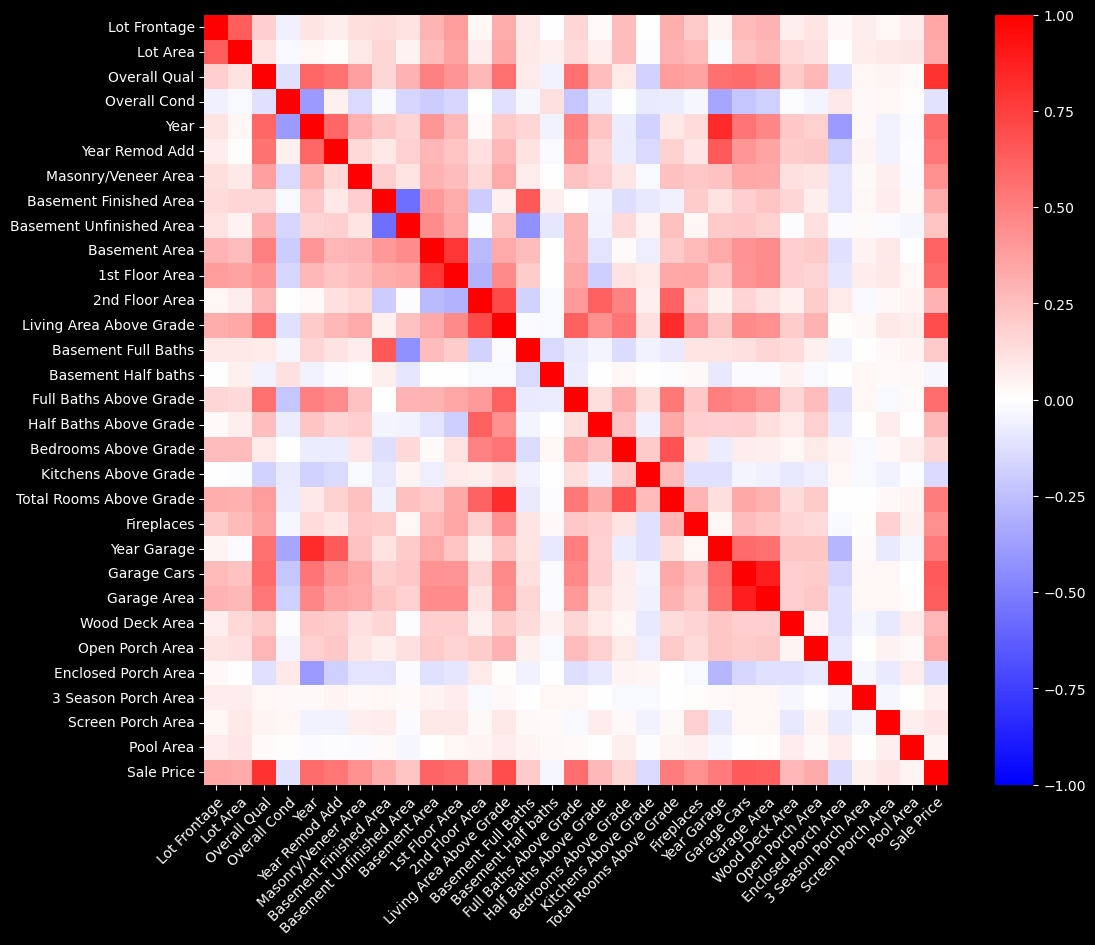

In [12]:
corr = df.select_dtypes(exclude=object).corr()
#display(corr)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    cmap='bwr'
)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

# Explore the Type column

Type
1-STORY 1946 & NEWER    506
2-STORY 1946 & NEWER    288
1-1/2 STORY ALL AGES    134
1-STORY PUD              77
2-STORY PUD              63
1-STORY 1945 & OLDER     62
2-STORY 1945 & OLDER     58
SPLIT OR MULTI-LEVEL     57
DUPLEX                   45
2 FAMILY CONVERSION      26
SPLIT FOYER              20
2-1/2 STORY ALL AGES     13
1 STORY PUD               8
Name: count, dtype: int64

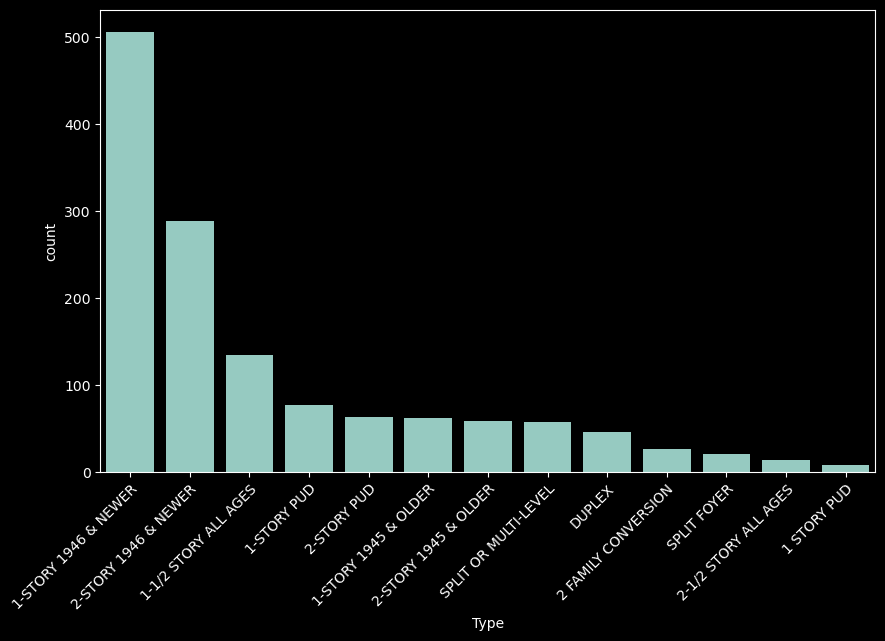

In [13]:
vc = df.Type.value_counts()
display(vc)

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Type",
    order=vc.index
);

plt.xticks(
    rotation=45,
    ha='right',
    rotation_mode='anchor'
);

### Replace errant values

In [14]:
df.Type = df.Type.replace(
    {'1 STORY PUD':'1-STORY PUD',
     '2 FAMILY CONVERSION':'2-FAMILY CONVERSION'}
)

df.Type.value_counts()

Type
1-STORY 1946 & NEWER    506
2-STORY 1946 & NEWER    288
1-1/2 STORY ALL AGES    134
1-STORY PUD              85
2-STORY PUD              63
1-STORY 1945 & OLDER     62
2-STORY 1945 & OLDER     58
SPLIT OR MULTI-LEVEL     57
DUPLEX                   45
2-FAMILY CONVERSION      26
SPLIT FOYER              20
2-1/2 STORY ALL AGES     13
Name: count, dtype: int64

### Compare Type and Lot Shape (countplot w/ hue)

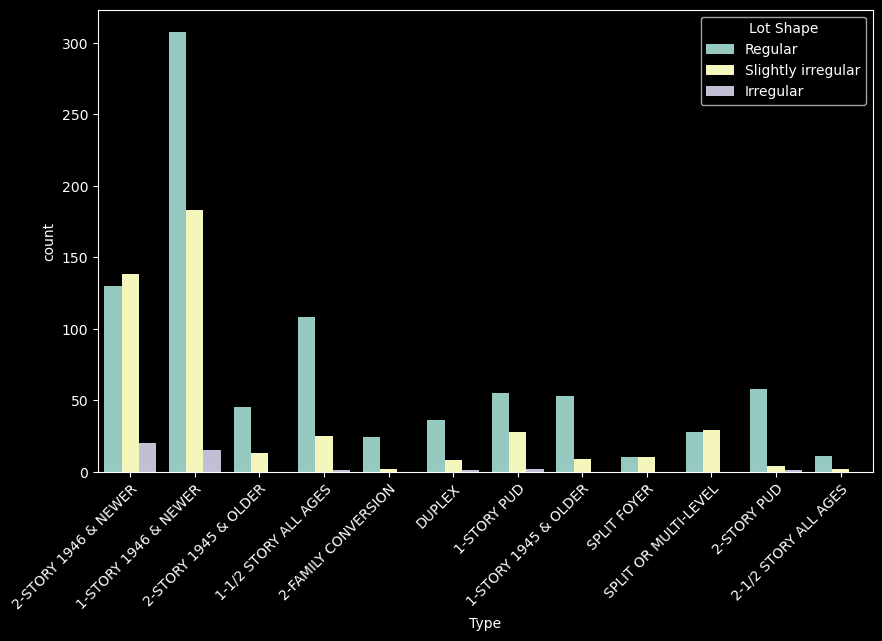

In [15]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Type",
    hue="Lot Shape"
);

plt.xticks(
    rotation=45,
    ha='right',
    rotation_mode='anchor'
);

### Compare prices of 1-story and 2-story homes

In [16]:
df[ df.Type.str.startswith('1-STORY') ]['Sale Price'].median()

155000.0

In [17]:
df[ df.Type.str.startswith('2-STORY') ]['Sale Price'].median()

193000.0

### Compare prices of old and new houses

In [18]:
df[ df.Type.str.contains('OLDER') ]['Sale Price'].median()

117950.0

In [19]:
df[ df.Type.str.contains('NEWER') ]['Sale Price'].median()

183350.0

### Compare old, 1-story vs new, 2-story

In [20]:
df[ df.Type.str.startswith('1-STORY') & df.Type.str.contains('OLDER') ]['Sale Price'].median()

100000.0

In [21]:
df[ df.Type.str.startswith('2-STORY') & df.Type.str.contains('NEWER') ]['Sale Price'].median()

215000.0

### Using .apply() to create a 'Floors' column

In [22]:
def get_floors(x):
    if type(x) == str:
        if '1-STORY' in x:
            return 1
        elif '1-1/2 STORY' in x:
            return 1.5
        elif '2-STORY' in x:
            return 2
        elif '2-1/2 STORY' in x:
            return 2.5
        # end
    # end
    
    return np.nan
# end

df['Floors'] = df.Type.apply(get_floors)

In [23]:
df[['Type','Floors']].sample(5)

,Type,Floors
1380,2-STORY 1946 & NEWER,2.0
708,2-STORY 1946 & NEWER,2.0
648,1-STORY 1946 & NEWER,1.0
264,1-STORY 1946 & NEWER,1.0
671,1-STORY 1946 & NEWER,1.0


# Explore the Nbhd column

Nbhd
North Ames                    214
College Creek                 150
Old Town                      101
Edwards                        87
Somerset                       85
Gilbert                        79
Sawyer                         74
Northwest Ames                 72
Northridge Heights             70
Sawyer West                    56
Brookside                      49
Mitchell                       47
Crawford                       45
Iowa DOT and Rail Road         34
Northridge                     33
Timberland                     32
South & West of Iowa State     23
Stone Brook                    23
Clear Creek                    20
Briardale                      16
Bloomington Hts                11
Meadow Village                 10
Northpark Villa                 9
Veenker                         9
Bloomington Heights             6
Bluestem                        2
Name: count, dtype: int64

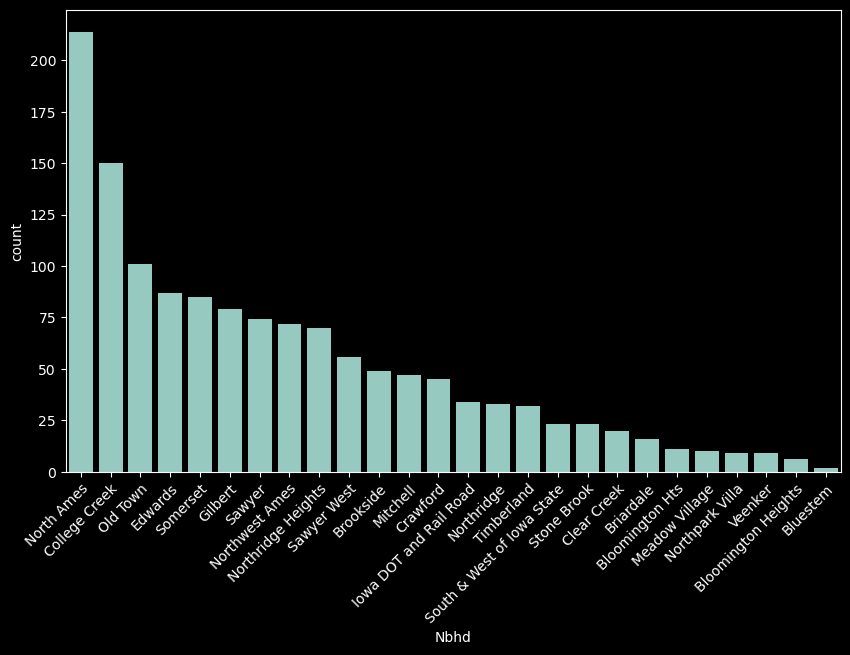

In [24]:
vc = df.Nbhd.value_counts()
display(vc)

plt.figure(figsize=(10,6))
sns.countplot(df, x="Nbhd", order=vc.index);
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

### Replace errant values

In [25]:
df.Nbhd = df.Nbhd.replace(
    {'Bloomington Hts':'Bloomington Heights'}
)

df.Nbhd.value_counts()

Nbhd
North Ames                    214
College Creek                 150
Old Town                      101
Edwards                        87
Somerset                       85
Gilbert                        79
Sawyer                         74
Northwest Ames                 72
Northridge Heights             70
Sawyer West                    56
Brookside                      49
Mitchell                       47
Crawford                       45
Iowa DOT and Rail Road         34
Northridge                     33
Timberland                     32
Stone Brook                    23
South & West of Iowa State     23
Clear Creek                    20
Bloomington Heights            17
Briardale                      16
Meadow Village                 10
Veenker                         9
Northpark Villa                 9
Bluestem                        2
Name: count, dtype: int64

### Compare Sale Price of 3 most populous to 3 least populous

In [26]:
most_pop = vc.index[:3]

df[ df.Nbhd.isin(most_pop) ]['Sale Price'].median()

145000.0

In [27]:
least_pop = vc.index[:-3]

df[ df.Nbhd.isin(least_pop) ]['Sale Price'].median()

162000.0

### Get median prices for each neighborhod

In [28]:
gb = df.groupby(["Nbhd"])['Sale Price'].median().sort_values(ascending=False)
gb

Nbhd
Northridge Heights            307500.0
Northridge                    290000.0
Stone Brook                   275000.0
Timberland                    233500.0
Somerset                      225000.0
College Creek                 197200.0
Veenker                       194000.0
Bloomington Heights           191000.0
Crawford                      191000.0
Clear Creek                   190000.0
Northwest Ames                181950.0
Gilbert                       181000.0
Sawyer West                   179550.0
Mitchell                      153500.0
Northpark Villa               146000.0
North Ames                    141000.0
South & West of Iowa State    139500.0
Bluestem                      137500.0
Sawyer                        135000.0
Brookside                     128000.0
Edwards                       119000.0
Old Town                      119000.0
Meadow Village                106000.0
Briardale                     106000.0
Iowa DOT and Rail Road        104750.0
Name: Sale Price, dt

<Axes: xlabel='Sale Price', ylabel='Nbhd'>

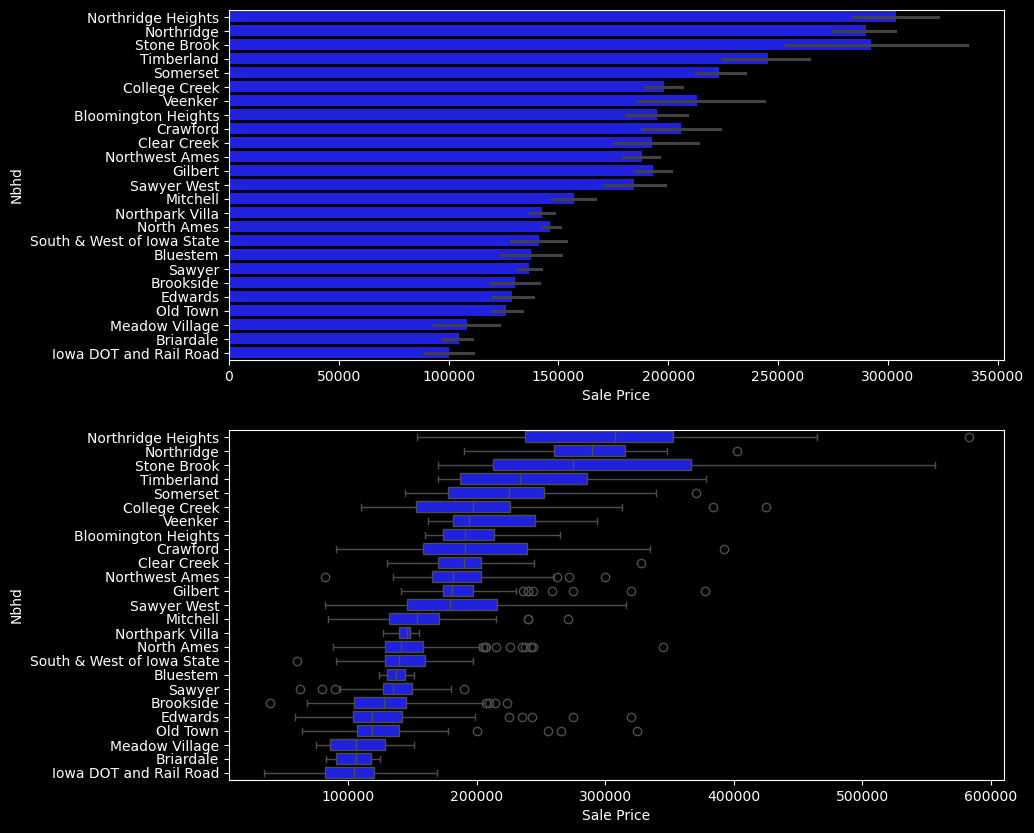

In [29]:
idx = gb.index

plt.figure(figsize=(10,10))

plt.subplot(211)
sns.barplot( data=df, x="Sale Price", y="Nbhd", color='b', order=idx )

plt.subplot(212)
sns.boxplot( data=df, x="Sale Price", y="Nbhd", color='b', order=idx )

### Plot median price vs. count

<Axes: xlabel='count', ylabel='Sale Price'>

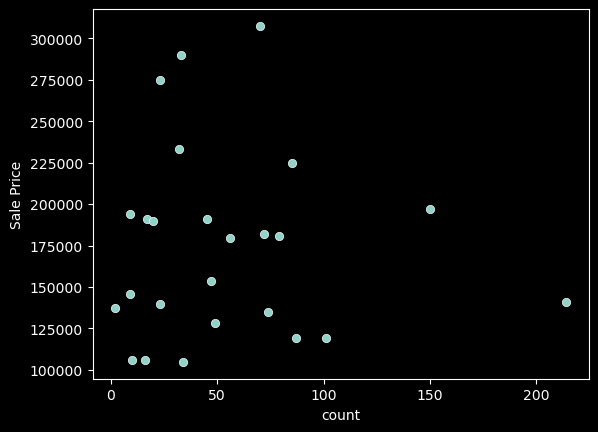

In [30]:
vc = df.Nbhd.value_counts().sort_index()
gb = df.groupby(["Nbhd"])['Sale Price'].median().sort_index()

sns.scatterplot( x=vc, y=gb )

### Describe each neighborhood

In [31]:
df.groupby(["Nbhd"])['Sale Price'].describe()#.sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
Nbhd,,,,,,,,
Bloomington Heights,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.0,264561.0
Bluestem,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.0,151000.0
Briardale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.0,125000.0
Brookside,49.0,130242.346939,39944.277008,39300.0,105000.00,128000.0,145000.0,223500.0
Clear Creek,20.0,192766.600000,44194.445419,130000.0,170125.00,190000.0,203125.0,328000.0
College Creek,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.0,424870.0
Crawford,45.0,205614.155556,62371.204175,90350.0,158500.00,191000.0,239000.0,392500.0
Edwards,87.0,128973.793103,44363.454430,58500.0,104250.00,119000.0,142250.0,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.00,181000.0,197200.0,377500.0


### Pivot Nbhd and Type

In [32]:
pt = df.pivot_table(index='Nbhd', columns='Type', values='Sale Price', aggfunc='median')
pt

Type,1-1/2 STORY ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER,1-STORY PUD,2-1/2 STORY ALL AGES,2-FAMILY CONVERSION,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD,DUPLEX,SPLIT FOYER,SPLIT OR MULTI-LEVEL
Nbhd,,,,,,,,,,,,
Bloomington Heights,NaN,NaN,159895.0,191500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bluestem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137500.0,NaN,NaN,NaN
Briardale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106000.0,NaN,NaN,NaN
Brookside,132500.0,89000.0,77900.0,NaN,214500.0,123500.0,160537.5,NaN,NaN,NaN,NaN,NaN
Clear Creek,181000.0,NaN,190000.0,181500.0,NaN,NaN,244400.0,196000.0,NaN,NaN,NaN,155000.0
College Creek,NaN,NaN,194500.0,143500.0,NaN,NaN,NaN,213500.0,NaN,NaN,133900.0,147000.0
Crawford,183475.0,128625.0,224000.0,333750.0,164000.0,157000.0,195550.0,NaN,NaN,145000.0,NaN,NaN
Edwards,116500.0,84000.0,128250.0,NaN,NaN,125000.0,108000.0,162450.0,130000.0,118500.0,168000.0,151000.0
Gilbert,164000.0,NaN,178492.5,NaN,NaN,145000.0,NaN,183750.0,NaN,NaN,NaN,170000.0


In [33]:
pt = df.pivot_table(index='Nbhd', columns='Type', values='Sale Price', aggfunc='count', fill_value=0)
pt['Total'] = pt.sum(axis=1)
pt.loc['Total'] = pt.sum(axis=0)
pt

Type,1-1/2 STORY ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER,1-STORY PUD,2-1/2 STORY ALL AGES,2-FAMILY CONVERSION,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD,DUPLEX,SPLIT FOYER,SPLIT OR MULTI-LEVEL,Total
Nbhd,,,,,,,,,,,,,
Bloomington Heights,0,0,1,16,0,0,0,0,0,0,0,0,17
Bluestem,0,0,0,0,0,0,0,0,2,0,0,0,2
Briardale,0,0,0,0,0,0,0,0,16,0,0,0,16
Brookside,25,13,2,0,1,2,6,0,0,0,0,0,49
Clear Creek,4,0,4,2,0,0,1,6,0,0,0,3,20
College Creek,0,0,81,10,0,0,0,53,0,0,3,3,150
Crawford,8,4,9,2,1,1,18,0,0,2,0,0,45
Edwards,16,12,36,0,0,3,3,2,4,5,2,4,87
Gilbert,1,0,10,0,0,1,0,60,0,0,0,7,79


### Achieve the same with crosstab

Type,1-1/2 STORY ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER,1-STORY PUD,2-1/2 STORY ALL AGES,2-FAMILY CONVERSION,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD,DUPLEX,SPLIT FOYER,SPLIT OR MULTI-LEVEL
Nbhd,,,,,,,,,,,,
Bloomington Heights,0,0,1,16,0,0,0,0,0,0,0,0
Bluestem,0,0,0,0,0,0,0,0,2,0,0,0
Briardale,0,0,0,0,0,0,0,0,16,0,0,0
Brookside,25,13,2,0,1,2,6,0,0,0,0,0
Clear Creek,4,0,4,2,0,0,1,6,0,0,0,3
College Creek,0,0,81,10,0,0,0,53,0,0,3,3
Crawford,8,4,9,2,1,1,18,0,0,2,0,0
Edwards,16,12,36,0,0,3,3,2,4,5,2,4
Gilbert,1,0,10,0,0,1,0,60,0,0,0,7


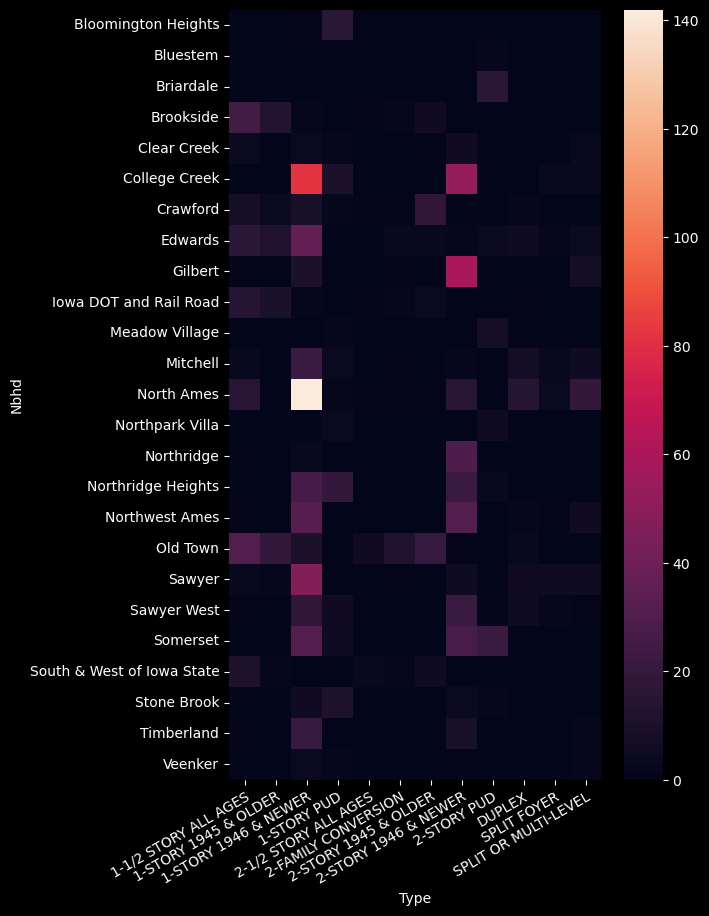

In [34]:
ct = pd.crosstab( df.Nbhd, df.Type )
display(ct)

plt.figure(figsize=(6,10))

sns.heatmap(ct)

plt.gca().set_xticklabels(
    plt.gca().get_xticklabels(),
    rotation=30,
    ha='right',
    rotation_mode='anchor'
)

plt.show()

### Which Neighborhood has the highest ratio of 2-story to 1-story homes?

In [35]:
ct = pd.crosstab( df.Nbhd, df.Type )

one_story = ct.iloc[ :, ct.columns.str.contains("1-STORY") ].sum(axis=1)
two_story = ct.iloc[ :, ct.columns.str.contains("2-STORY") ].sum(axis=1)

(two_story / one_story).sort_values(ascending=False)

Nbhd
Briardale                          inf
Bluestem                           inf
Northridge                    9.666667
Gilbert                       6.000000
Meadow Village                4.000000
South & West of Iowa State    2.500000
Somerset                      1.361111
Northpark Villa               1.250000
Crawford                      1.200000
Clear Creek                   1.166667
Sawyer West                   0.958333
Northwest Ames                0.937500
Old Town                      0.724138
College Creek                 0.582418
Northridge Heights            0.555556
Timberland                    0.450000
Brookside                     0.400000
Stone Brook                   0.352941
Iowa DOT and Rail Road        0.333333
Edwards                       0.187500
Veenker                       0.166667
North Ames                    0.111111
Sawyer                        0.102041
Mitchell                      0.076923
Bloomington Heights           0.000000
dtype: float64

# Explore Sale Price column

<Axes: xlabel='Sale Price', ylabel='Density'>

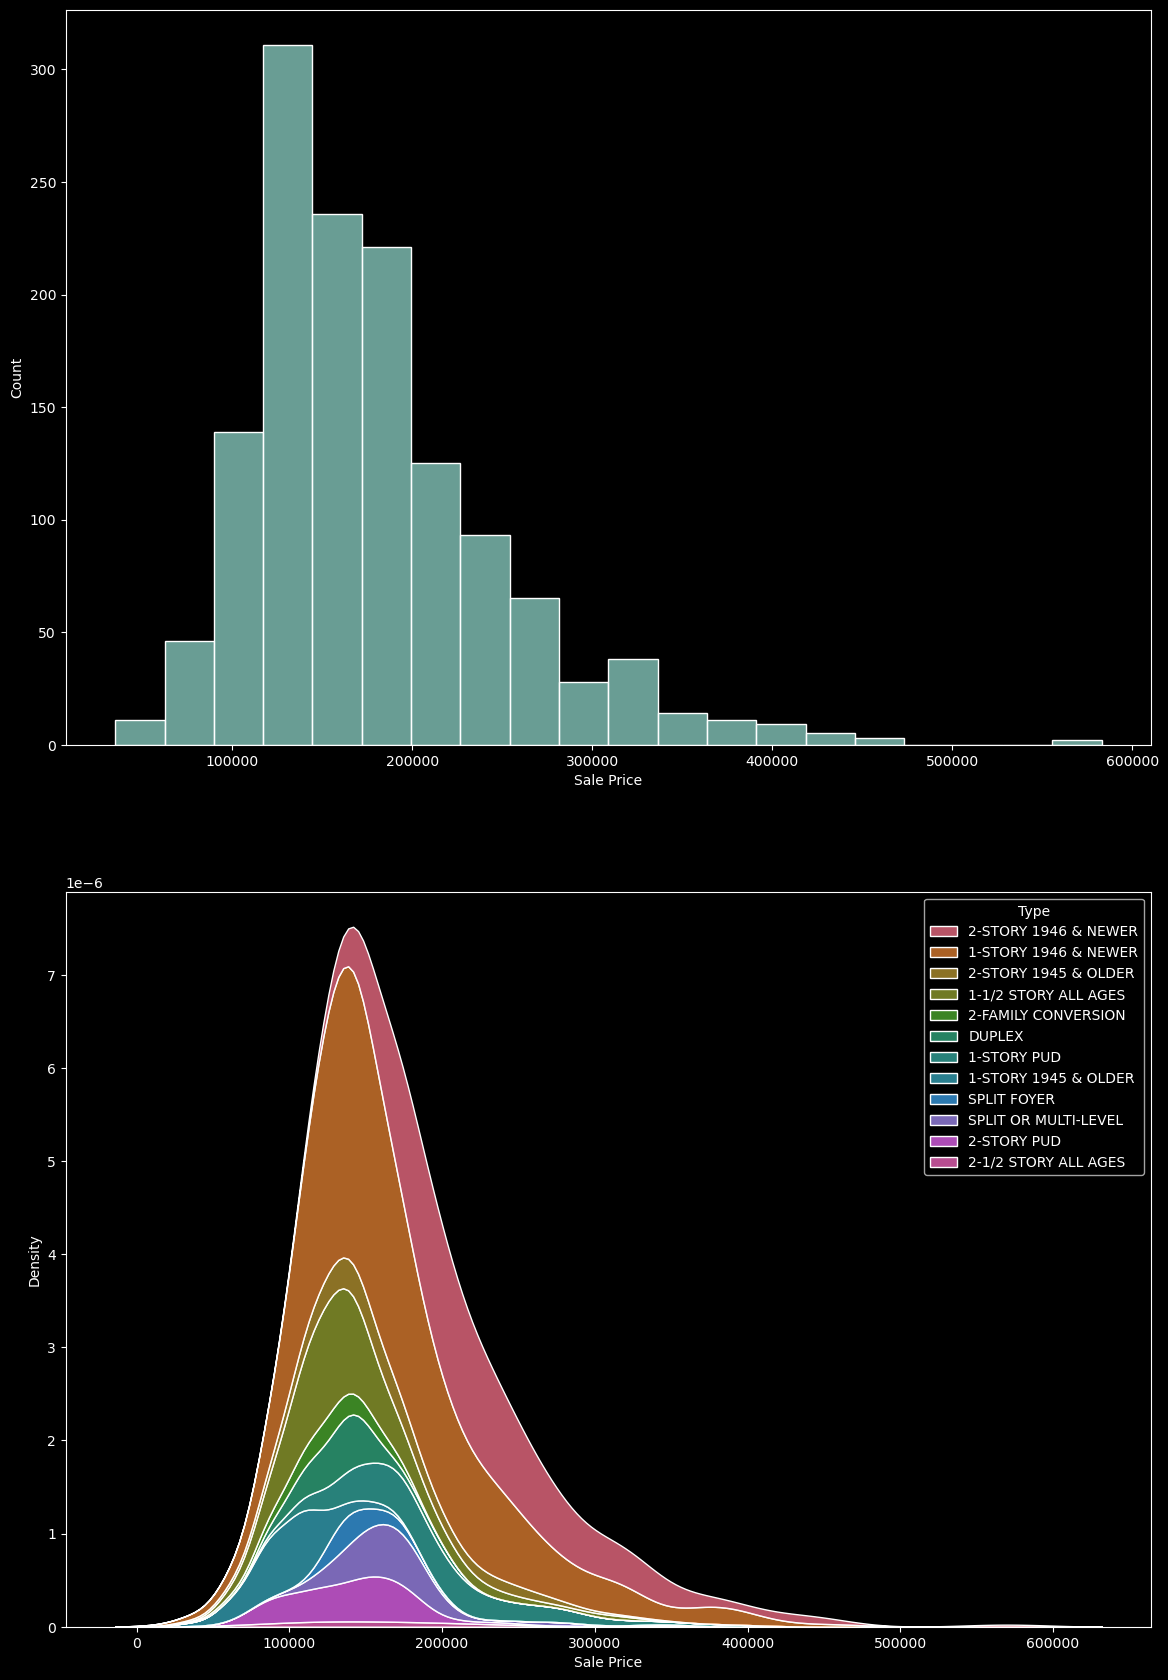

In [36]:
plt.figure(figsize=(14,21))

plt.subplot(211)
sns.histplot(
    data=df,
    x='Sale Price',
    bins=20,
    kde=False
)

plt.subplot(212)
sns.kdeplot(
    data=df,
    x='Sale Price',
    hue='Type',
    multiple="stack",
    fill=True
)

# Explore Lot Frontage column

<Axes: >

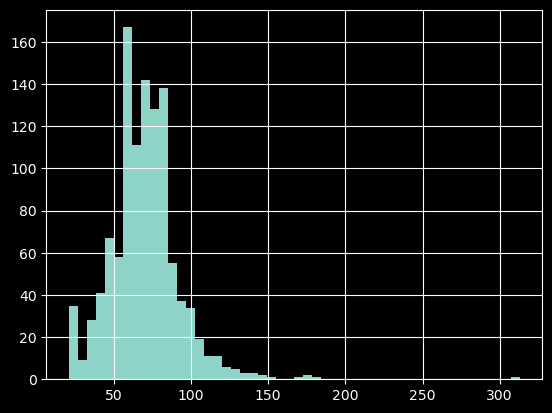

In [37]:
df['Lot Frontage'].hist(bins=50)

### Fill nans in Lot Frontage column

<Axes: >

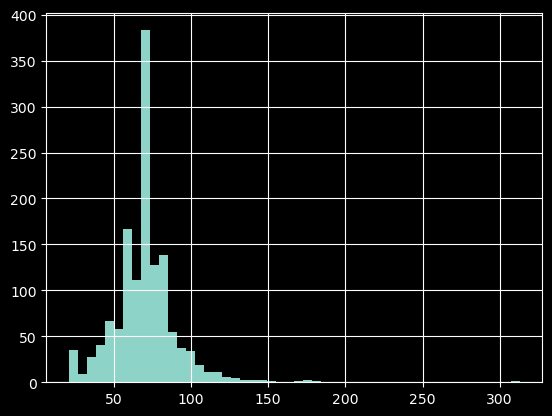

In [38]:
df['Lot Frontage'].fillna( df['Lot Frontage'].median() ).hist(bins=50)

In [39]:
gb = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()
gb

Nbhd
Briardale                     21.0
Bluestem                      24.0
Northpark Villa               24.0
Meadow Village                38.5
Bloomington Heights           43.0
Brookside                     52.0
South & West of Iowa State    60.0
Iowa DOT and Rail Road        60.0
Old Town                      60.0
Stone Brook                   63.0
Gilbert                       65.0
Sawyer West                   66.0
Edwards                       67.0
College Creek                 70.0
Sawyer                        71.0
North Ames                    73.0
Somerset                      74.0
Crawford                      74.5
Mitchell                      75.0
Northwest Ames                80.0
Veenker                       80.0
Clear Creek                   80.5
Timberland                    85.0
Northridge Heights            86.0
Northridge                    90.0
Name: Lot Frontage, dtype: float64

<Axes: >

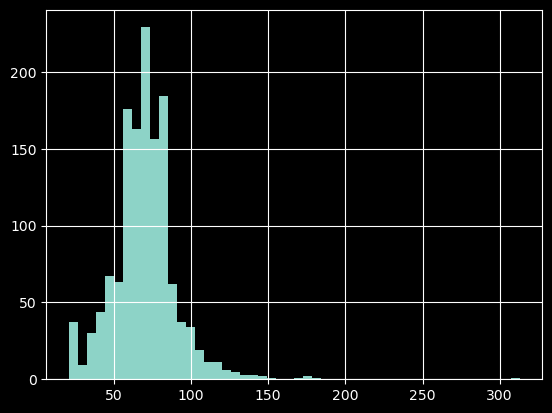

In [40]:
def fill(r):
    L = r['Lot Frontage']
    
    if pd.isna(L):
        n = r.Nbhd
        return gb[n]
    else:
        return L
    # end
# end

df.apply(fill, axis=1).hist(bins=50)

### Average Lot Frontage of houses from neighborhoods with mean prices of >$200k

In [41]:
gb = df.groupby(["Nbhd"])['Sale Price'].mean()
idx = gb[ gb>200000 ].index

df[ df['Nbhd'].isin(idx) ]['Lot Frontage'].mean()

73.9885496183206